In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')


In [8]:
"""
SibSp : 동행 탑승자 수
Parch : 탑승 가족 수
Embarked : C=Cherbourg , Q=Queenstown, S=Southhamton
"""


'\nSibSp : 동행 탑승자 수\nParch : 탑승 가족 수\nEmbarked : C=Cherbourg , Q=Queenstown, S=Southhamton\n# '

In [12]:
train.isnull().sum()
# isnull 확인 결과 Age, Cabin,  Embarked 가 다수 빠져있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:

def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts() #train csv 에서 survived 값이 1 인 feature 값을 모두 세줘!
    dead =  train[train['Survived']==0][feature].value_counts() #마찬가지로 survived 값이 0 인 값 모두 세줘!
    df = pd.DataFrame([survived,dead])
    df.index=['Survived',"Dead"]
    df.plot(kind='bar',stacked=True,figsize=(10,5))


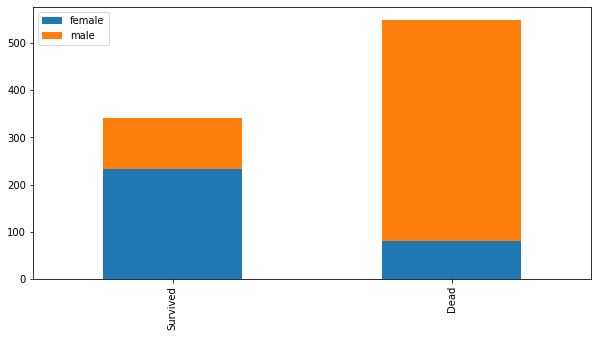

In [26]:
bar_chart('Sex')

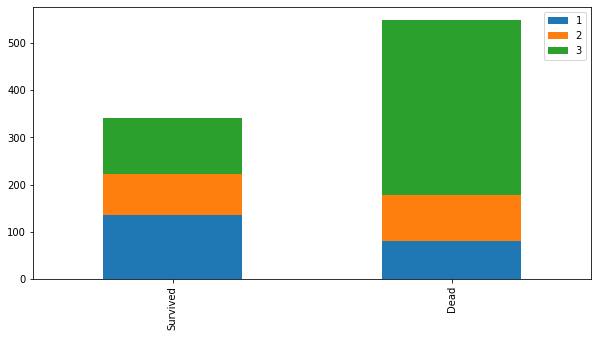

In [28]:
bar_chart('Pclass')

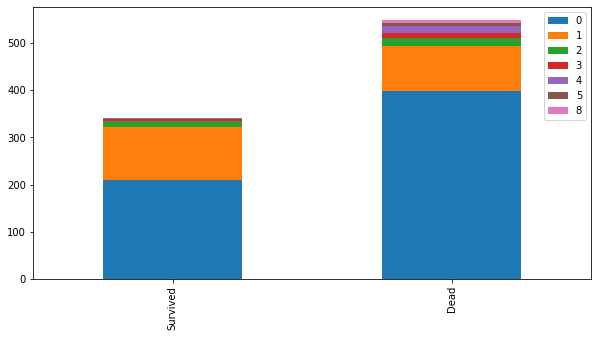

In [30]:
bar_chart('SibSp')

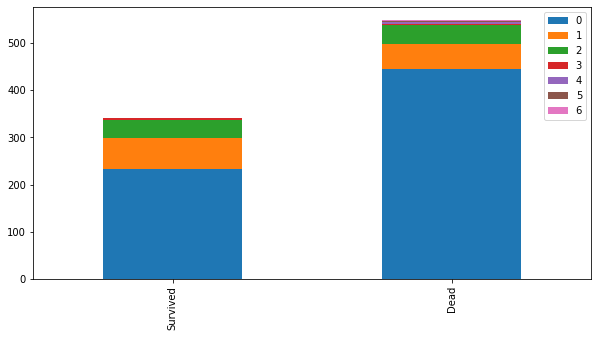

In [31]:
bar_chart('Parch')

In [33]:
train_test_data  = [train,test]

for dataset in  train_test_data:
    dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [34]:
train["Title"].value_counts()
title_mapping = {[]}

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Lady          1
Countess      1
Jonkheer      1
Capt          1
Ms            1
Don           1
Sir           1
Mme           1
Name: Title, dtype: int64